# 1. Mini Case AW-Bikes

Se tienen datos sobre un comercio de venta al por menor de bicicletas y recambios. En concreto, contiene datos de 18 355 individuos que se han dado de alta en la plataforma de compra online.

Se deben analizar los datos y proponer un modelo de clasificación que permita etiquetar a un cliente como posible comprador de bicicleta, en función de sus características.

# 2. Lectura de datos y conexiones

In [1]:
## Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
## Lectura de datos
df = pd.read_excel('../data/Aw_Bike.xlsx')
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend,BikeBuyerText
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,1,3,0,1,81916,2017-03-06,1,50.97,YES
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,1,2,1,2,81076,2017-03-06,1,53.11,YES
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,S,0,3,0,0,86387,2017-03-06,1,54.08,YES
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,1,2,1,2,61481,2017-03-06,1,56.93,YES
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,S,1,1,0,0,51804,2017-03-06,1,55.41,YES


In [5]:
## Información del conjunto de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            18355 non-null  int64         
 1   Title                 101 non-null    object        
 2   FirstName             18355 non-null  object        
 3   MiddleName            10570 non-null  object        
 4   LastName              18355 non-null  object        
 5   Suffix                3 non-null      object        
 6   AddressLine1          18355 non-null  object        
 7   AddressLine2          311 non-null    object        
 8   City                  18355 non-null  object        
 9   StateProvinceName     18355 non-null  object        
 10  CountryRegionName     18355 non-null  object        
 11  PostalCode            18355 non-null  object        
 12  PhoneNumber           18355 non-null  object        
 13  BirthDate       

# 3. Exploración y limpieza de datos

In [8]:
## Revisar si hay registros duplicados por usuarios
df.duplicated("CustomerID").sum()

np.int64(0)

In [6]:
### Eliminar información irrelevante
df.drop(['CustomerID',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'Suffix',
 'AddressLine1',
 'AddressLine2',
 'PostalCode',
 'PhoneNumber',
 'BirthDate',
 'LastUpdated'],
        axis = 1, inplace = True)

## 3.1 Análisis univariable

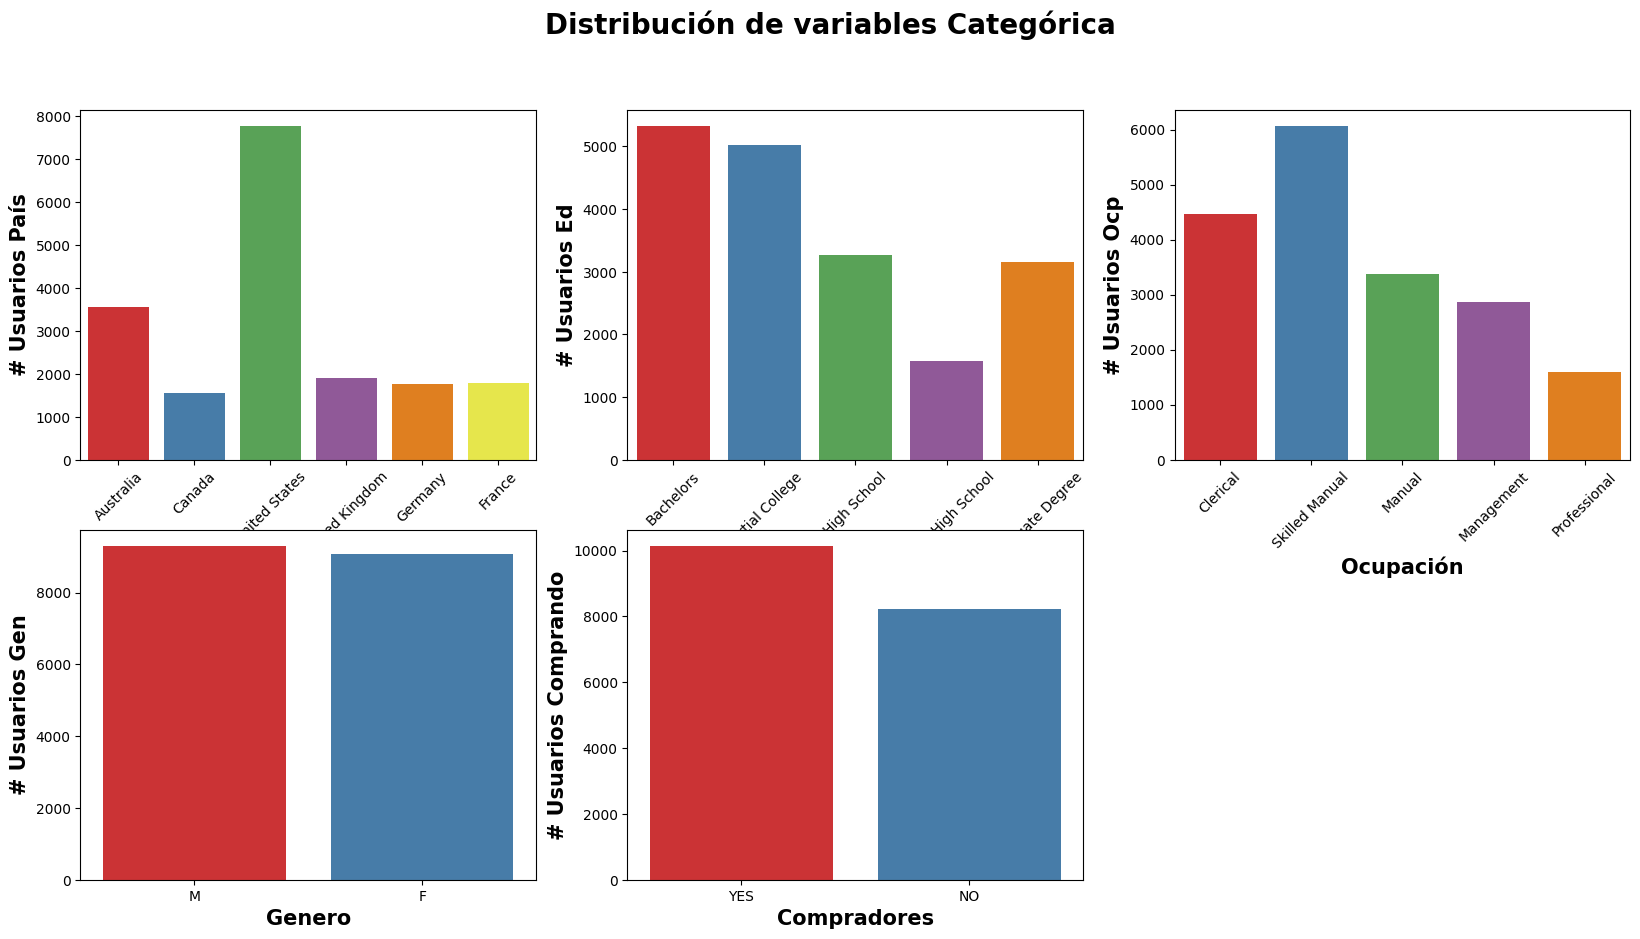

In [7]:
## Distribución variables catégoricas

# Se muestra la distribución de las variables a estudiar

plt.figure(figsize=(20,10))
plt.suptitle('Distribución de variables Categórica' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x='CountryRegionName',data = df,palette="Set1")
plt.xlabel("País", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios País", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.countplot(x='Education',data = df,palette="Set1")
plt.xlabel("Educación", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Ed", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)


plt.subplot(2,3,3)
sns.countplot(x='Occupation',data = df,palette="Set1")
plt.xlabel("Ocupación", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Ocp", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.countplot(x='Gender',data = df,palette="Set1")
plt.xlabel("Genero", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Gen", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.countplot(x='BikeBuyerText',data = df,palette="Set1")
plt.xlabel("Compradores", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Comprando", fontweight = "black", fontsize = 15);

Text(0, 0.5, 'Densidad')

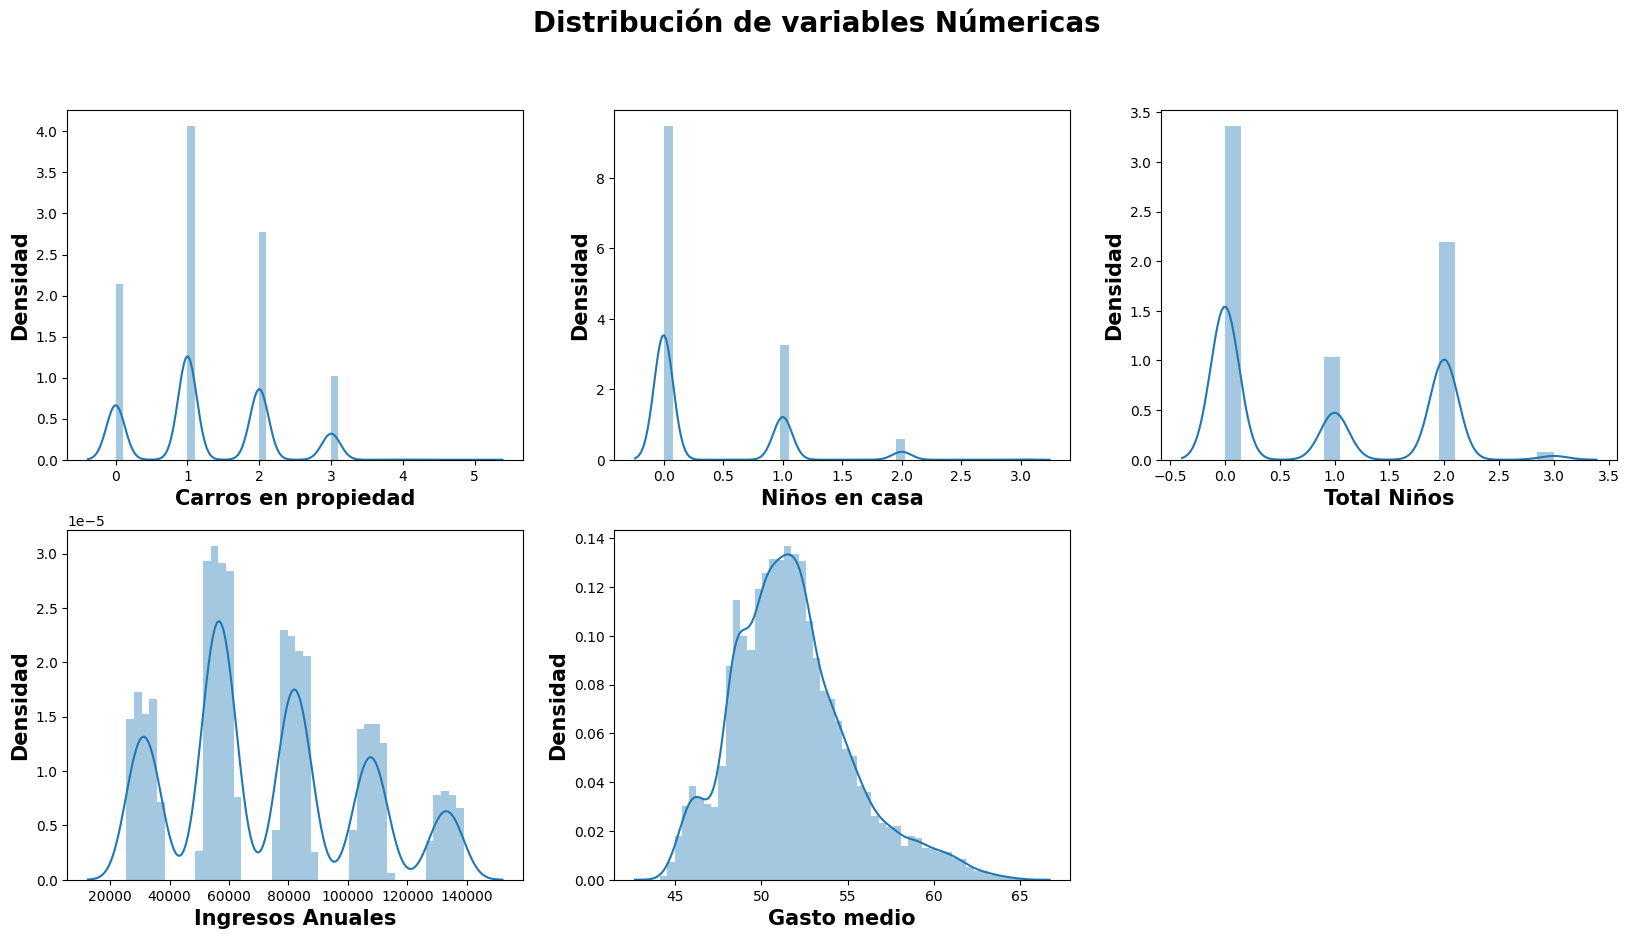

In [8]:
# Se muestra la distribución de las variables a estudiar

plt.figure(figsize=(20,10))
plt.suptitle('Distribución de variables Númericas' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.distplot(df['NumberCarsOwned']);
plt.xlabel("Carros en propiedad", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad", fontweight = "black", fontsize = 15)

plt.subplot(2,3,2)
sns.distplot(df['NumberChildrenAtHome']);
plt.xlabel("Niños en casa", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad", fontweight = "black", fontsize = 15)


plt.subplot(2,3,3)
sns.distplot(df['TotalChildren']);
plt.xlabel("Total Niños", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad", fontweight = "black", fontsize = 15)

plt.subplot(2,3,4)
sns.distplot(df['YearlyIncome']);
plt.xlabel("Ingresos Anuales", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.distplot(df['AvgMonthSpend']);
plt.xlabel("Gasto medio", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad", fontweight = "black", fontsize = 15)

## 3.2 Análisis Multivariado

Text(0, 0.5, '# Usuarios Marital')

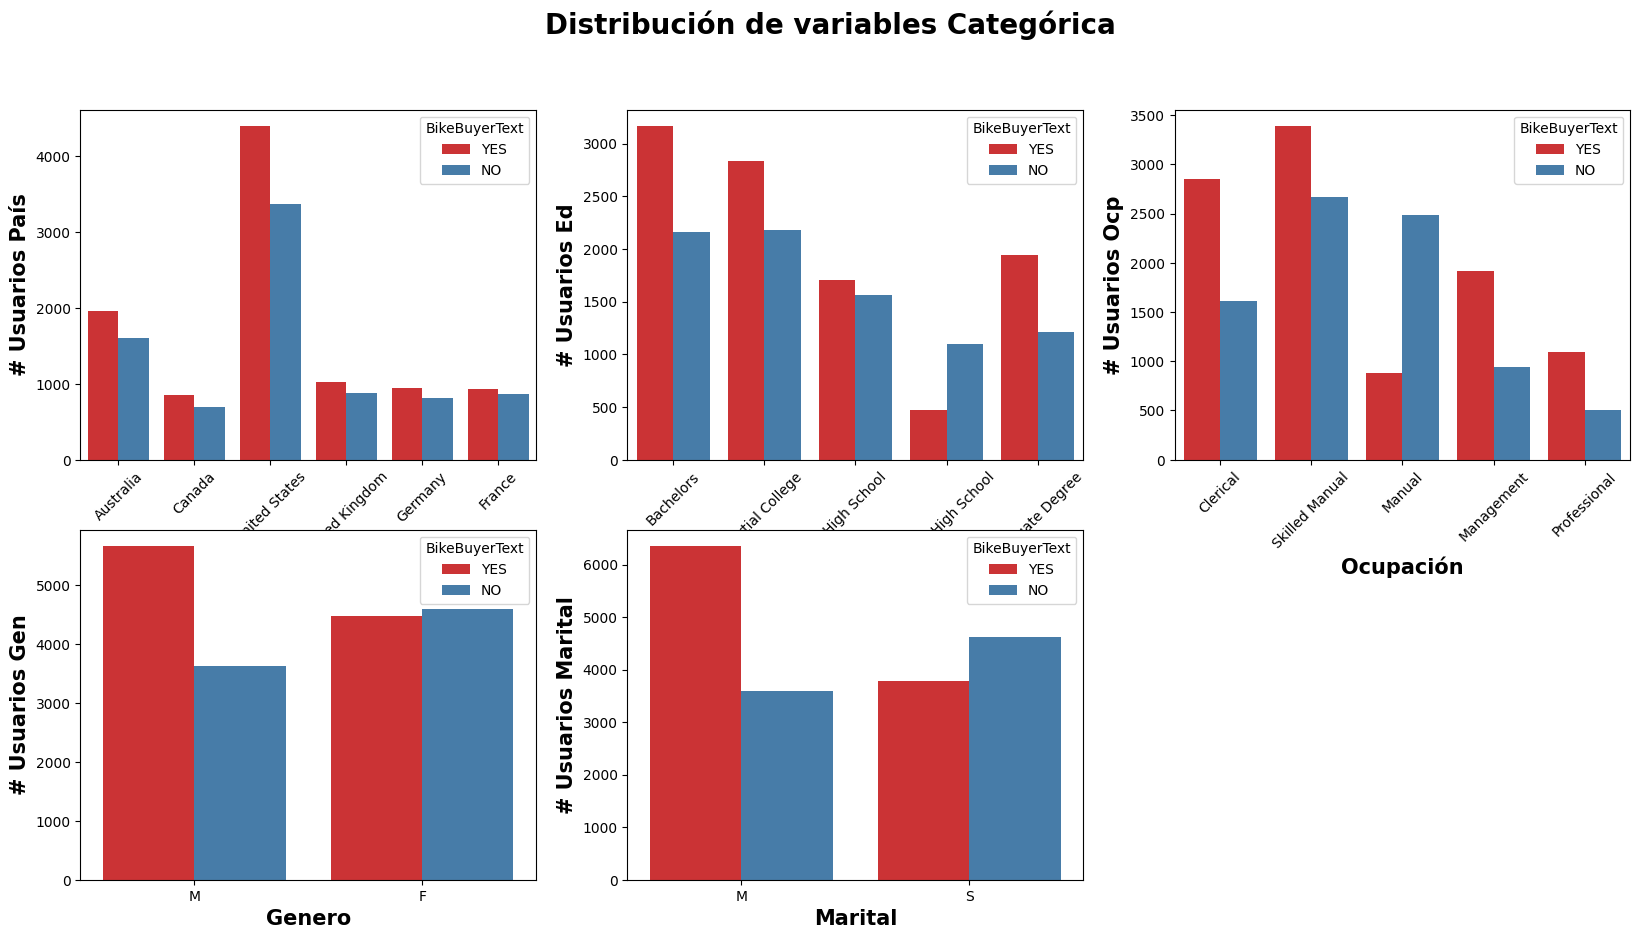

In [9]:
# Se muestra la distribución de las variables a estudiar

plt.figure(figsize=(20,10))
plt.suptitle('Distribución de variables Categórica' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x='CountryRegionName',hue = "BikeBuyerText",data = df,palette="Set1")
plt.xlabel("País", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios País", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.countplot(x='Education',hue = "BikeBuyerText",data = df,palette="Set1")
plt.xlabel("Educación", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Ed", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)


plt.subplot(2,3,3)
sns.countplot(x='Occupation',hue = "BikeBuyerText",data = df,palette="Set1")
plt.xlabel("Ocupación", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Ocp", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.countplot(x='Gender',hue = "BikeBuyerText",data = df,palette="Set1")
plt.xlabel("Genero", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Gen", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.countplot(x='MaritalStatus',hue = "BikeBuyerText",data = df,palette="Set1")
plt.xlabel("Marital", fontweight = "black", fontsize = 15)
plt.ylabel("# Usuarios Marital", fontweight = "black", fontsize = 15)

Text(0, 0.5, 'Gasto Medio')

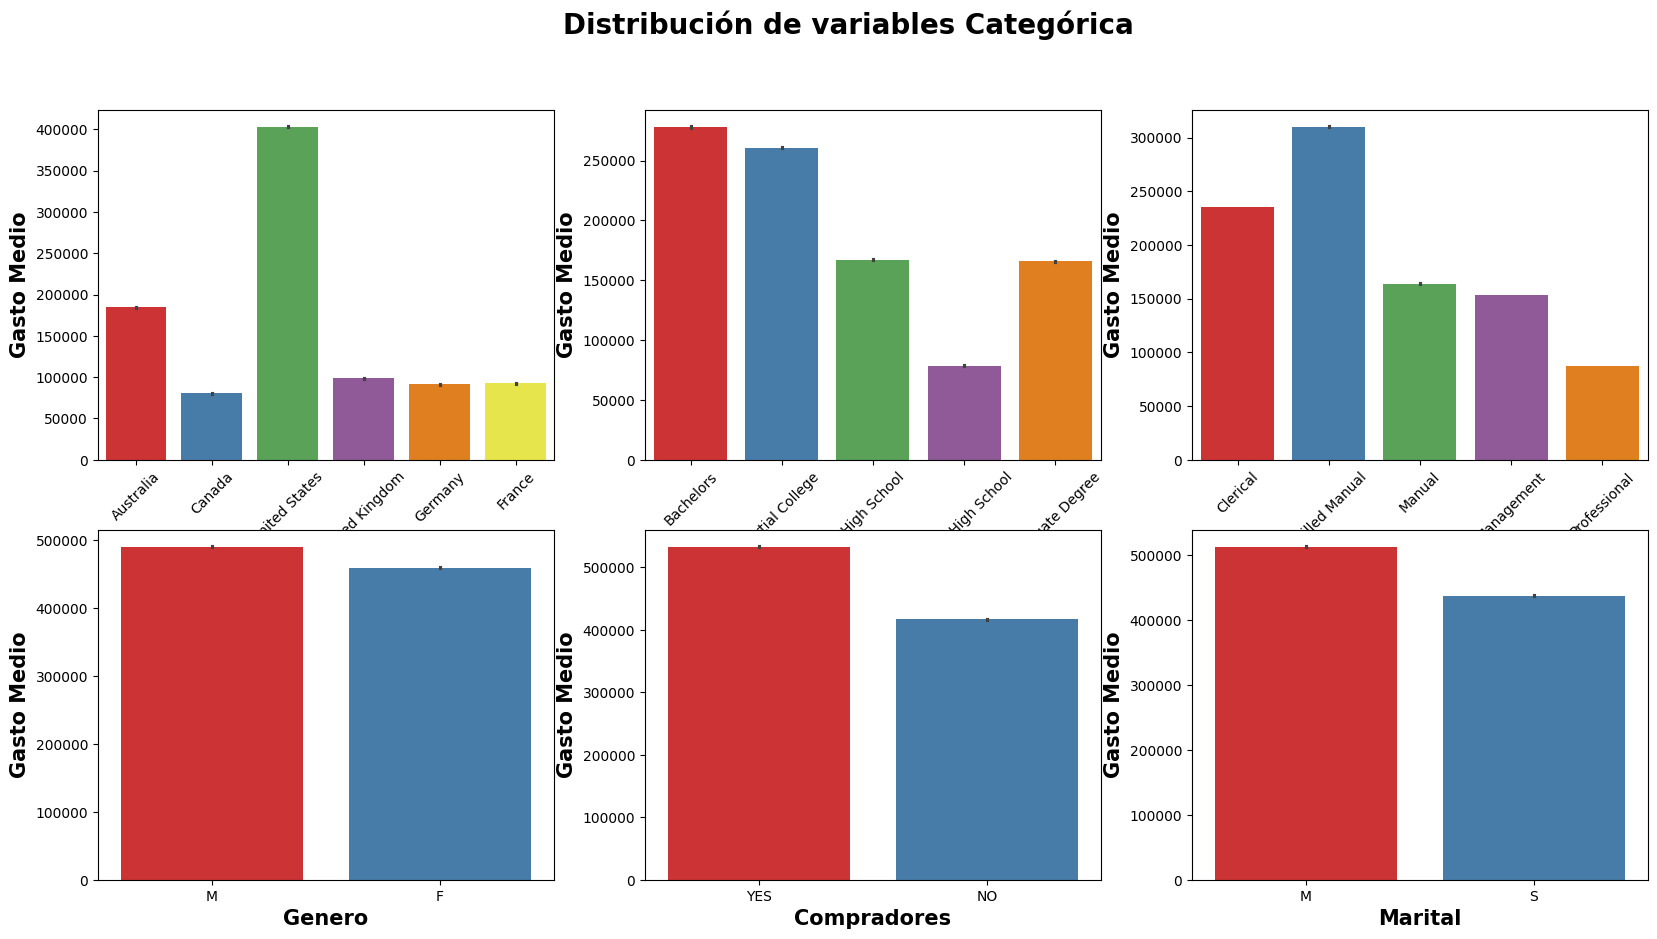

In [10]:
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de variables Categórica' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.barplot(x='CountryRegionName',y = "AvgMonthSpend",data = df,estimator=sum, palette="Set1")
plt.xlabel("País", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.barplot(x='Education',y = "AvgMonthSpend",data = df,estimator=sum,palette="Set1")
plt.xlabel("Educación", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)


plt.subplot(2,3,3)
sns.barplot(x='Occupation',y = "AvgMonthSpend",data = df,estimator=sum,palette="Set1")
plt.xlabel("Ocupación", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.barplot(x='Gender',y = "AvgMonthSpend",data = df,estimator=sum,palette="Set1")
plt.xlabel("Genero", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)


plt.subplot(2,3,5)
sns.barplot(x='BikeBuyerText',y = "AvgMonthSpend",data = df,estimator=sum,palette="Set1")
plt.xlabel("Compradores", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)


plt.subplot(2,3,6)
sns.barplot(x='MaritalStatus',y = "AvgMonthSpend",data = df,estimator=sum,palette="Set1")
plt.xlabel("Marital", fontweight = "black", fontsize = 15)
plt.ylabel("Gasto Medio", fontweight = "black", fontsize = 15)

Text(0, 0.5, 'Ingreso Anual')

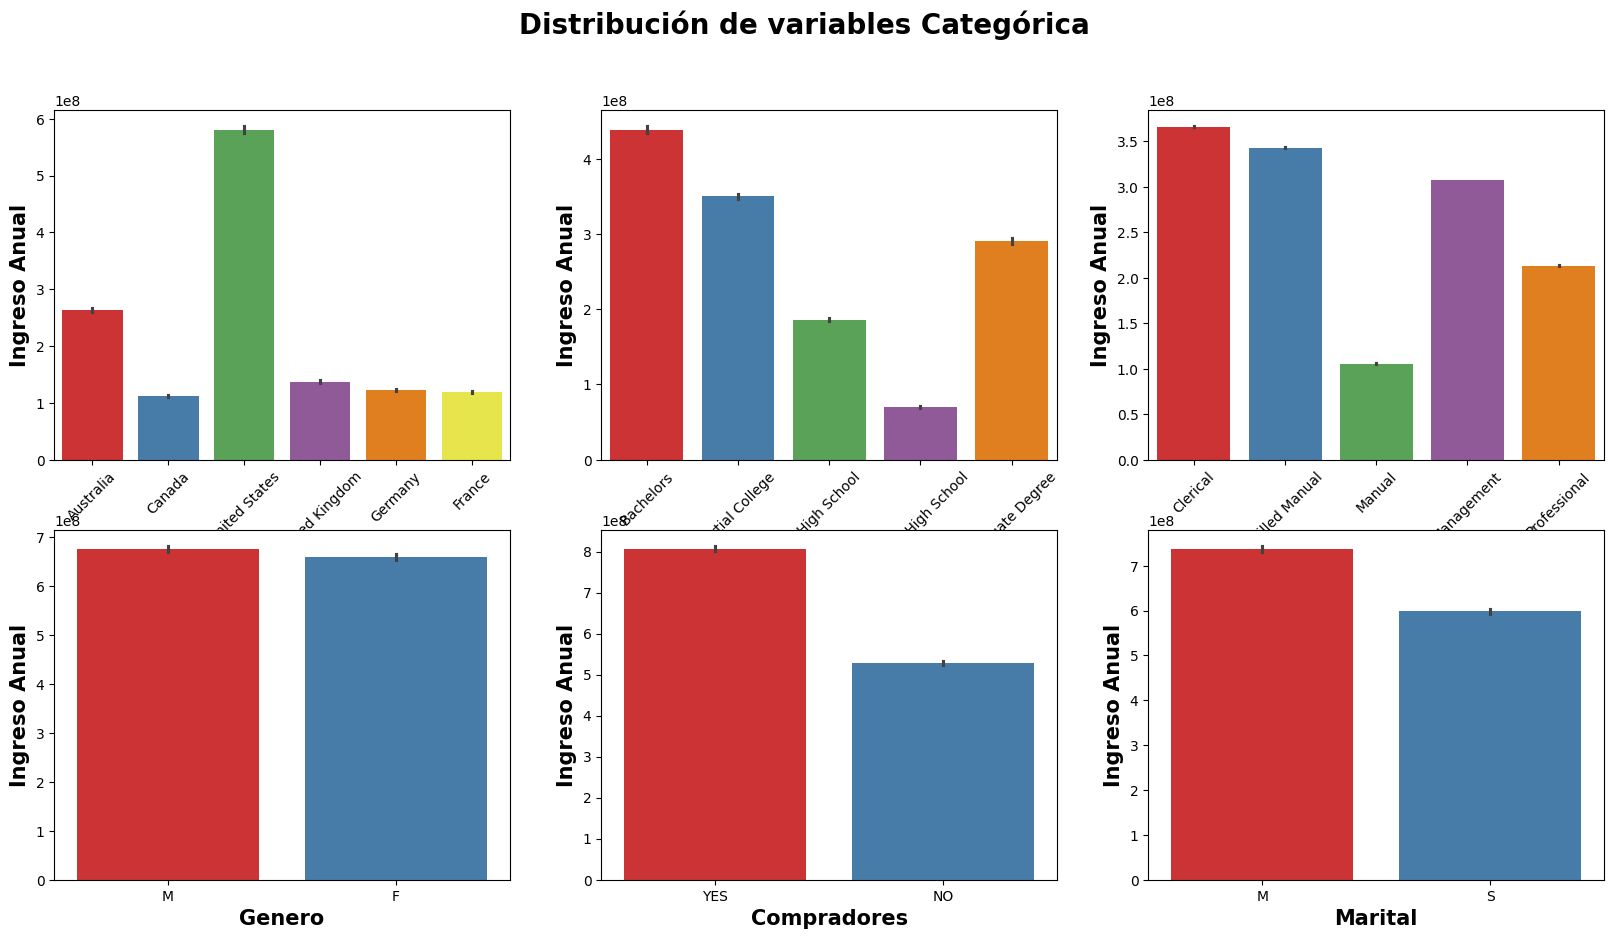

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle('Distribución de variables Categórica' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.barplot(x='CountryRegionName',y = "YearlyIncome",data = df,estimator=sum, palette="Set1")
plt.xlabel("País", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.barplot(x='Education',y = "YearlyIncome",data = df,estimator=sum,palette="Set1")
plt.xlabel("Educación", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)


plt.subplot(2,3,3)
sns.barplot(x='Occupation',y = "YearlyIncome",data = df,estimator=sum,palette="Set1")
plt.xlabel("Ocupación", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.barplot(x='Gender',y = "YearlyIncome",data = df,estimator=sum,palette="Set1")
plt.xlabel("Genero", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.barplot(x='BikeBuyerText',y = "YearlyIncome",data = df,estimator=sum,palette="Set1")
plt.xlabel("Compradores", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)


plt.subplot(2,3,6)
sns.barplot(x='MaritalStatus',y = "YearlyIncome",data = df,estimator=sum,palette="Set1")
plt.xlabel("Marital", fontweight = "black", fontsize = 15)
plt.ylabel("Ingreso Anual", fontweight = "black", fontsize = 15)

In [12]:
##
df_fact = df.copy()

df_fact["City_n"] = pd.factorize(df_fact["City"])[0]
df_fact["StateProvinceName_n"] = pd.factorize(df_fact["StateProvinceName"])[0]
df_fact["CountryRegionName_n"] = pd.factorize(df_fact["CountryRegionName"])[0]
df_fact["Education_n"] = pd.factorize(df_fact["Education"])[0]
df_fact["Occupation_n"] = pd.factorize(df_fact["Occupation"])[0]
df_fact["Gender_n"] = pd.factorize(df_fact["Gender"])[0]
df_fact["MaritalStatus_n"] = pd.factorize(df_fact["MaritalStatus"])[0]


In [13]:
df_fact = df_fact[[
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'BikeBuyer',
 'AvgMonthSpend',
 'City_n',
 'StateProvinceName_n',
 'CountryRegionName_n',
 'Education_n',
 'Occupation_n',
 'Gender_n',
 'MaritalStatus_n']]

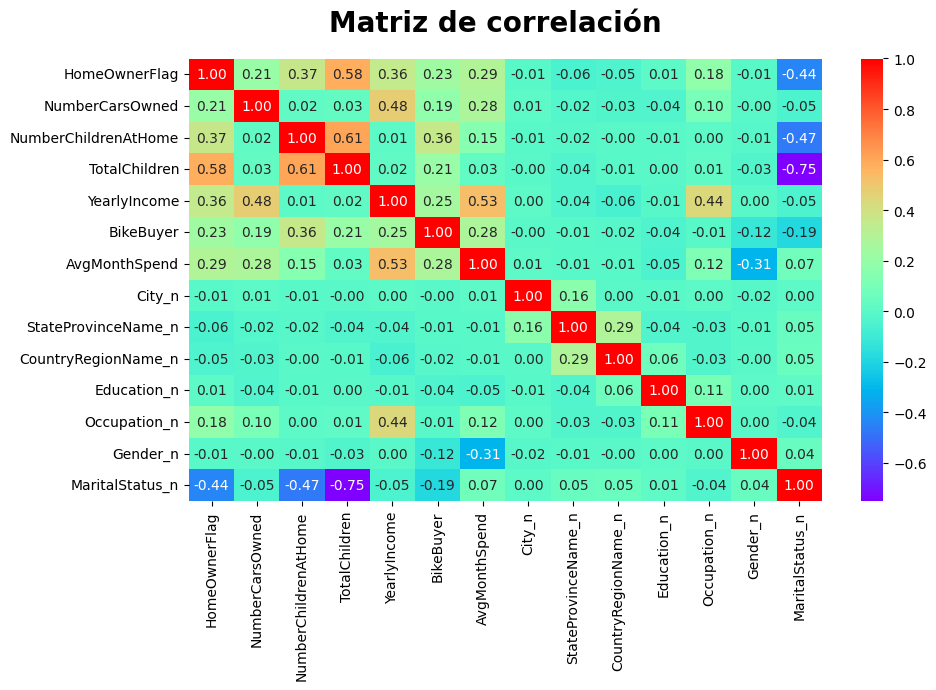

In [14]:
### Matriz de correlación

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df_fact.corr(),cmap='rainbow' ,annot = True, fmt = ".2f")
plt.suptitle('Matriz de correlación' , fontweight = 'black', fontsize=20);
plt.tight_layout()

plt.show()

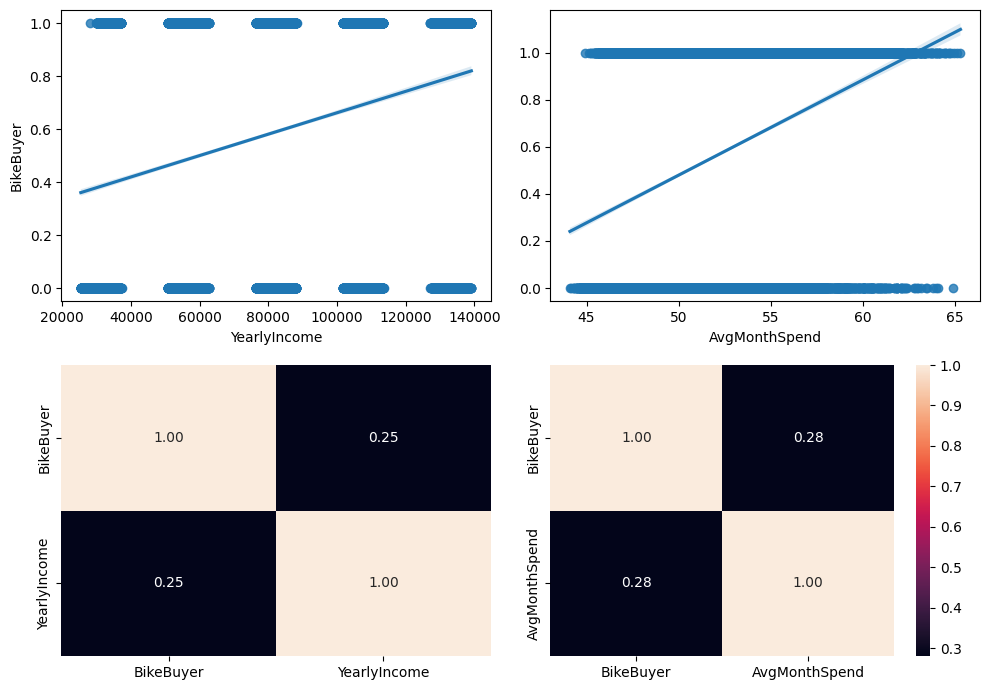

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df_fact, x = "YearlyIncome", y = "BikeBuyer")
sns.heatmap(df_fact[["BikeBuyer", "YearlyIncome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df_fact, x = "AvgMonthSpend", y = "BikeBuyer").set(ylabel=None)
sns.heatmap(df_fact[["BikeBuyer", "AvgMonthSpend"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

num_variables = ['HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'AvgMonthSpend',
 'City_n',
 'Education_n',
 'Occupation_n',
 'Gender_n',
 'MaritalStatus_n']

# Dividimos el conjunto de datos en muestras de train y test
X = df_fact.drop("BikeBuyer", axis = 1)[num_variables]
y = df_fact["BikeBuyer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,City_n,Education_n,Occupation_n,Gender_n,MaritalStatus_n
10885,1,3,1,2,109111,61.48,38,0,3,0,0
7383,0,0,0,0,56577,49.70,91,2,1,1,1
1571,1,1,0,0,133887,52.50,138,0,4,1,0
18061,1,2,0,2,58066,49.44,3,0,1,1,0
9888,1,2,0,3,108901,51.34,3,0,3,1,0


# 4. Modelado

In [17]:
# Agregar modelo en el diccionario
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


models = {"KNN": KNeighborsClassifier(),
          "RL": LogisticRegression(),
          "AD": DecisionTreeClassifier(),
          "RF": RandomForestClassifier()
          }

# Crear función para entrenar y evaliar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
## Scoring de los modelos
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.5706891855080359,
 'RL': 0.6600381367474802,
 'AD': 0.7245982021247617,
 'RF': 0.7600108962135658}

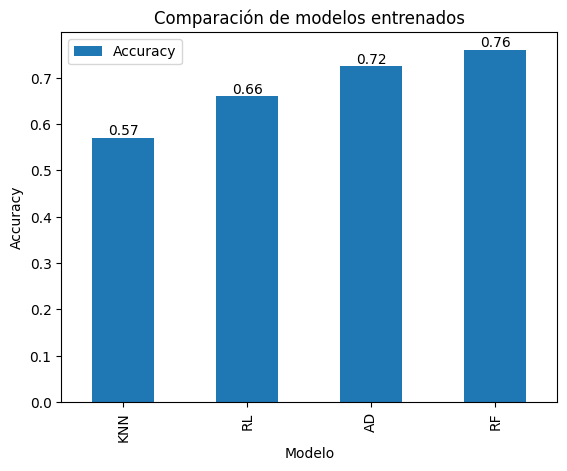

In [19]:
## Comparación de modelo
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
ax = model_compare.T.plot.bar()
plt.title('Comparación de modelos entrenados')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')

for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')

plt.show();

In [20]:
##### Codigo para optimización de parametros

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Espacio de búsqueda de cada hiperparámetro para random forest
rf_grid = {"n_estimators": np.arange(50,500,10),
           "max_depth": [None,10,15,20,30],
           "min_samples_leaf": np.arange(5, 30, 5),
           "max_features": [10,15,20,"sqrt", "auto"]}

# Búsqueda por validación cruzada para random forest
rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions =rf_grid,
                              scoring    = 'accuracy',
                              n_iter= 10,
                              cv=5,
                              n_jobs=-1,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20, 30],
                                        'max_features': [10, 15, 20, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490])},
                   scoring='accuracy', verbose=True)

In [21]:
## Mejores parámetros
rs_model.best_params_

{'n_estimators': np.int64(200),
 'min_samples_leaf': np.int64(20),
 'max_features': 10,
 'max_depth': 10}

In [22]:
## Score
rs_model.best_score_

np.float64(0.7844585987852069)

In [23]:
rf_ideal_model = RandomForestClassifier(**rs_model.best_params_)

rf_ideal_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=10,
                       min_samples_leaf=np.int64(20),
                       n_estimators=np.int64(200))

In [24]:
## Predicciones
y_preds = rf_ideal_model.predict(X_test)
y_preds_train = rf_ideal_model.predict(X_train)

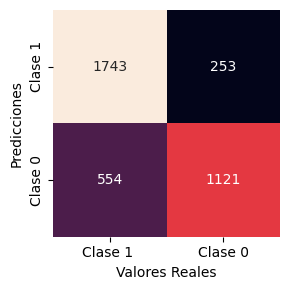

In [25]:
## Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds,labels=[1, 0])

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm, index=["Clase 1", "Clase 0"],
                     columns=["Clase 1 ", "Clase 0"])

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.tight_layout()

plt.show()

In [26]:
confusion_matrix(y_test, y_preds, labels=[1, 0])

array([[1743,  253],
       [ 554, 1121]])

In [27]:
## Exactitud en train
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_preds_train)

0.8097929719422501

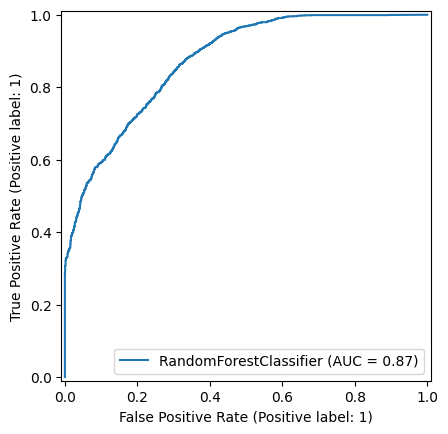

In [28]:
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=rf_ideal_model,
                               X=X_test,
                               y=y_test);

In [29]:
## Reporte de clasificación
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1675
           1       0.76      0.87      0.81      1996

    accuracy                           0.78      3671
   macro avg       0.79      0.77      0.77      3671
weighted avg       0.78      0.78      0.78      3671



In [33]:
report = classification_report(y_test, y_preds,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.814842,0.662090,0.730567,1675.000000
1,0.754978,0.873747,0.810033,1996.000000
accuracy,0.777172,0.777172,0.777172,0.777172
macro avg,0.784910,0.767919,0.770300,3671.000000
weighted avg,0.782293,0.777172,0.773774,3671.000000


# MLFLOW

In [ ]:
import mlflow
import mlflow.sklearn

In [ ]:
## Definir puerto
#mlflow.set_tracking_uri("http://0.0.0.0:5000")

In [39]:
experimento = df_fact[['HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'AvgMonthSpend',
 'City_n',
 'Education_n',
 'Occupation_n',
 'Gender_n',
 'MaritalStatus_n','BikeBuyer']]

experimento.to_csv("../data/experimentos.csv")

In [33]:
# Iniciar un experimento de MLflow

dataset_source_url = "https://github.com/LeoPalaciosC/Caso-AW-Bikes/blob/main/data/Aw_Bike.xlsx"

mlflow.set_experiment("AW BIKE - Conjunto de datos")

with mlflow.start_run(run_name="Modelo RandomForest V2",log_system_metrics=True) as run:
    # Crear y entrenar el modelo
    clf = RandomForestClassifier(n_estimators = 110, min_samples_leaf = 15, max_features = 10, max_depth= 10)
    
    clf.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    # Loggin de hiperparámetros
    mlflow.log_params(clf.get_params())
    
    # Calcular métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Loggear métricas en MLflow
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    
    
    # Loggear conjuntos de datos como artefactos usando PandasDataset
    dataset_train = mlflow.data.from_pandas(
            pd.concat([X_train, y_train], axis=1), source=dataset_source_url, name="BikeBuyer quality", targets="BikeBuyer"
        )
    dataset_test = mlflow.data.from_pandas(
        pd.concat([X_test, y_test], axis=1), source=dataset_source_url, name="BikeBuyer quality", targets="BikeBuyer"
    )
    
    mlflow.log_input(dataset_train, context="training")
    mlflow.log_input(dataset_test, context="testing")
    
    # Loggear el modelo en MLflow con la firma del modelo
    signature = mlflow.models.infer_signature(X_train, clf.predict(X_train))
    mlflow.sklearn.log_model(clf, artifact_path="model", signature=signature)

    # Obtener el run_id
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

2025/02/20 01:57:50 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: `pynvml` is not installed, to log GPU metrics please run `pip install pynvml` to install it..
2025/02/20 01:57:50 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


2025/02/20 01:57:56 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/02/20 01:57:56 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


Run ID: 1a4e11c0d4e640fd93233e234b31d314


In [34]:
!mlflow ui

[2025-02-20 01:58:22 +0000] [19100] [INFO] Starting gunicorn 23.0.0
[2025-02-20 01:58:22 +0000] [19100] [INFO] Listening at: http://127.0.0.1:5000 (19100)
[2025-02-20 01:58:22 +0000] [19100] [INFO] Using worker: sync
[2025-02-20 01:58:22 +0000] [19101] [INFO] Booting worker with pid: 19101
[2025-02-20 01:58:22 +0000] [19102] [INFO] Booting worker with pid: 19102
[2025-02-20 01:58:22 +0000] [19103] [INFO] Booting worker with pid: 19103
[2025-02-20 01:58:22 +0000] [19105] [INFO] Booting worker with pid: 19105
[2025-02-20 02:01:10 +0000] [19100] [INFO] Handling signal: int
^C

Aborted!
[2025-02-20 02:01:11 +0000] [19103] [INFO] Worker exiting (pid: 19103)
